In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df_t=pd.read_csv('D:/Final Project Econ/trump sentiment and tweets.csv')
df_b=pd.read_csv('D:/Final Project Econ/biden sentiment and tweets.csv')

In [22]:
day_of_week_t=pd.to_datetime(df_t['created_at'])
day_of_week_t=day_of_week_t.dt.dayofweek.to_list()
df_t['day']=day_of_week_t

week=pd.to_datetime(df_t['created_at']).dt.isocalendar()
df_t['week']=week['week']


day_of_week_b=pd.to_datetime(df_b['created_at'])
day_of_week_b=day_of_week_b.dt.dayofweek.to_list()
df_b['day']=day_of_week_b

week_b=pd.to_datetime(df_b['created_at']).dt.isocalendar()
df_b['week']=week_b['week']

In [23]:
df_t.set_index(['week','day'],inplace=True)
df_t.sort_index(inplace=True)

df_b.set_index(['week','day'],inplace=True)
df_b.sort_index(inplace=True)

In [24]:
df_t2=df_t.copy()
df_t2=df_t2[(abs(df_t2['compound'])>.025)]

df_b2=df_b.copy()
df_b2=df_b2[(abs(df_b2['compound'])>.025)]


48

In [25]:
mean_val_t=[]
mean_val_t_adj=[]
for week in range(36,49):

    temp=[]
    temp2=[]
    if week==36:
        for day in range(1,7):
            temp.append((df_t.loc[week,day]['compound'].mean(),day))
            temp2.append((df_t2.loc[week,day]['compound'].mean(),day))
            if day==6:
                mean_val_t.append(temp)
                mean_val_t_adj.append(temp2)
            
    elif week==48:
        for day in range(6):
            temp.append((df_t.loc[week,day]['compound'].mean(),day))
            temp2.append((df_t2.loc[week,day]['compound'].mean(),day))
            if day==5:
                mean_val_t.append(temp)
                mean_val_t_adj.append(temp2)
    else:
        for day in range(7):
            temp.append((df_t.loc[week,day]['compound'].mean(),day))
            temp2.append((df_t2.loc[week,day]['compound'].mean(),day))

            if day==6:
                mean_val_t.append(temp)
                mean_val_t_adj.append(temp2)

In [26]:
mean_val_b=[]
for week in range(36,49):

    temp=[]
    if week==36:
        for day in range(1,7):
            temp.append((df_b.loc[week,day]['compound'].mean(),day))
            if day==6:
                mean_val_b.append(temp)
            
    elif week==48:
        for day in range(6):
            temp.append((df_b.loc[week,day]['compound'].mean(),day))
            if day==5:
                mean_val_b.append(temp)
    else:
        for day in range(7):
            temp.append((df_b.loc[week,day]['compound'].mean(),day))

            if day==6:
                mean_val_b.append(temp)


In [39]:
import numpy as np
np.linspace(-.2,.2,9)

array([-0.2 , -0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ])

C:\Users\capma\AppData\Local\Temp\ipykernel_26940\2598590015.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(week_names)


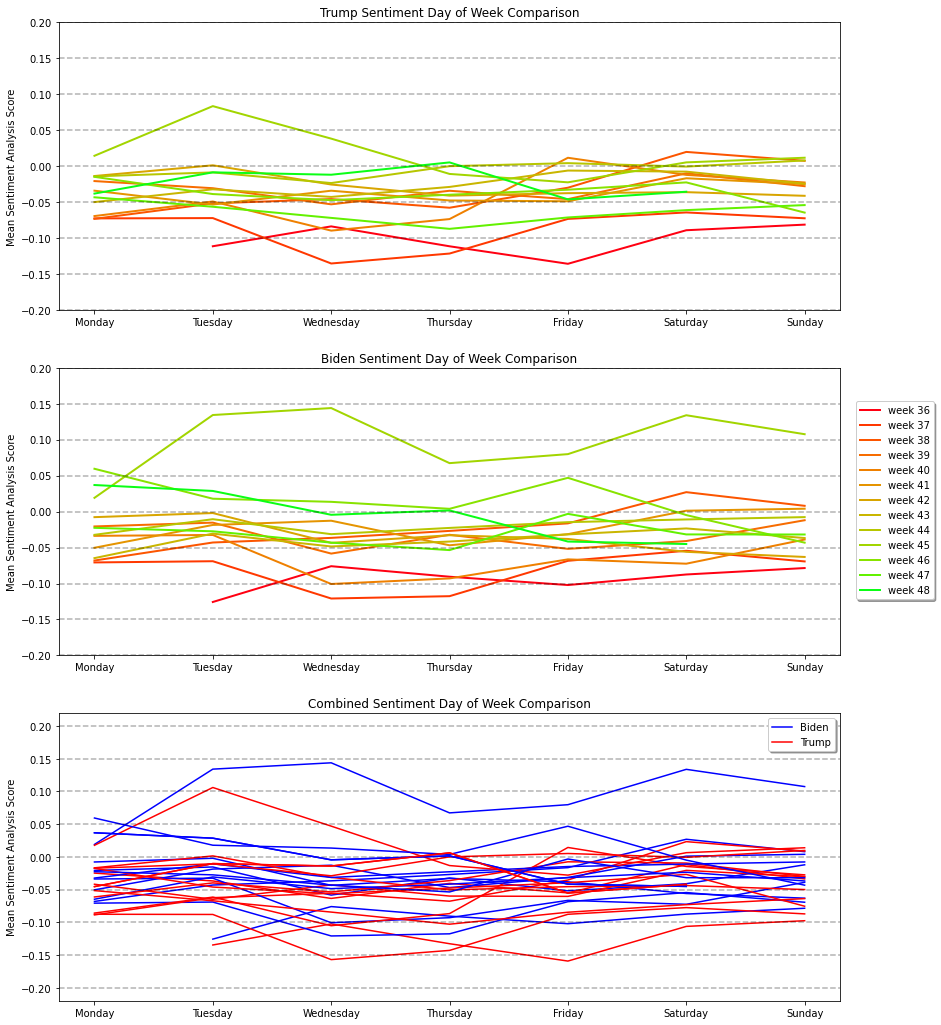

In [65]:
week_names=['-','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
color_list=['#ff0012','#ff3800','#fc5500','#f76c00','#ef8000','#e59400','#d8a500','#c9b600','#b7c600','#a2d500','#88e300','#63f100','#0bfe16']

fig, ax=plt.subplots(3,1,figsize=(14,18))
i=0

while i<len(mean_val_t):
    y,x=list(map(list, zip(*mean_val_t[i])))
    b,a=list(map(list,zip(*mean_val_t_adj[i])))
#    ax[1].plot(a,b,label=f'week {36+i}',color=color_list[i],linewidth=2)
    ax[0].plot(x,y,label=f'week {36+i}',color=color_list[i],linewidth=2)
    
    β,α=list(map(list, zip(*mean_val_b[i])))
    d,c=list(map(list,zip(*mean_val_b_adj[i])))
    ax[1].plot(c,d,label=f'week {36+i}',color=color_list[i],linewidth=2)
#    ax[2].plot(α,β,label=f'week {36+i}',color=color_list[i],linewidth=2)
    
    ax[2].plot(c,d,color='blue')
    ax[2].plot(a,b,color='red')
#    ax[5].plot(x,y,color='red')
#    ax[5].plot(α,β,color='blue')
    i=i+1

for i in range(3):
    ax[i].set_xticklabels(week_names)
    ax[i].set_yticks(np.linspace(-.2,.2,9))
    ax[i].set_ylabel('Mean Sentiment Analysis Score')
    
    for j in np.linspace(-.2,.2,9):
        ax[i].axhline(j,color='black',linestyle='--',alpha=.3)

ax[0].set_title('Trump Sentiment Day of Week Comparison')
ax[1].set_title('Biden Sentiment Day of Week Comparison')
ax[2].set_title('Combined Sentiment Day of Week Comparison')

ax[2].plot(c,d,color='blue',label='Biden')
ax[2].plot(a,b,color='red',label='Trump')

ax[1].legend(loc='upper center', bbox_to_anchor=(1.07,0.9),
          ncol=1, fancybox=True, shadow=True)
ax[2].legend(loc='upper right',
          ncol=1, fancybox=True, shadow=True)

plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\day_of_week_analysis_1.jpg',dpi=400,bbox_inches="tight")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\day_of_week_analysis_1.pdf',dpi=400,bbox_inches="tight")


plt.show()

In [28]:
"""
maybe graph pct change 
do biden's data
see how the candidates data change week to week, maybe do some time series math.

"""

"\nmaybe graph pct change \ndo biden's data\nsee how the candidates data change week to week, maybe do some time series math.\n\n"

In [ ]:
mean_val_b=[]
for week in range(36,49):

    temp=[]
    if week==36:
        for day in range(1,7):
            temp.append((df_b.loc[week,day]['compound'].mean(),day))
            if day==6:
                mean_val_b.append(temp)
            
    elif week==48:
        for day in range(6):
            temp.append((df_b.loc[week,day]['compound'].mean(),day))
            if day==5:
                mean_val_b.append(temp)
    else:
        for day in range(7):
            temp.append((df_b.loc[week,day]['compound'].mean(),day))

            if day==6:
                mean_val_b.append(temp)


In [136]:
df_b.loc[36,:]

,created_at,text,user_screen_name,user_created_at,user_followers_count,user_friends_count,is_quote,user_id_str,user_verified,user_description,user_name,neg,neu,pos,compound
day,,,,,,,,,,,,,,,
1,2020-09-01,Anyone else notice that Trump supporters have ...,cathymv,Mon Dec 08 16:00:12 +0000 2008,6931,7519,0,17965226,0,Conservative NY'er- what can go wrong?NASCAR f...,Cathymv - #MAGA #CULT45 #KAG,0.000,0.701,0.299,0.7964
1,2020-09-01,@Timcast @realDonaldTrump @DonaldJTrumpJr so n...,michaelosas346,Sat Sep 09 14:46:28 +0000 2017,236,803,1,906529242120421376,0,BetterDaysAhead,Wendy fields,0.000,1.000,0.000,0.0000
1,2020-09-01,Joe Biden has been trying to win the White Hou...,RobinWigg,Tue Jul 28 11:37:54 +0000 2009,43300,1522,0,60880381,1,Global finance correspondent for the Financial...,Robin Wigglesworth,0.000,0.833,0.167,0.7184
1,2020-09-01,Your dad is only 3 YEARS younger than Biden cu...,SahilAgg4,Wed Apr 12 23:36:39 +0000 2017,28,165,0,852304485535936512,0,"Progressive social democrat. I like films, Mar...",Sahil,0.071,0.812,0.118,0.2960
1,2020-09-01,The Trump campaign manipulated a video from @J...,padenpur,Tue Feb 17 21:10:18 +0000 2009,48553,53122,0,21130829,0,Rescue dog Mom! #Resist #DumpTrump #DitchMitch...,Denise P Rescue Dog Mom (@),0.113,0.887,0.000,-0.4257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,2020-09-06,@HerschelWalker @jmills616 @JoeBiden Remember....,capt_bradley,Wed Oct 21 03:38:58 +0000 2015,72,179,0,3964954574,0,Navy Captain (ret) High School Teacher (ret) M...,"CAPT JB Jones USN ret USNA '81 BS, MBA, Med",0.196,0.804,0.000,-0.2960
6,2020-09-06,Since Trump became president at least 66 forei...,hvsojourner,Sun Nov 01 15:37:55 +0000 2009,4225,2696,1,86742950,0,Be A Hudson Valley FanAddict!,HudsonValSojourner,0.109,0.732,0.159,0.3400
6,2020-09-06,And then @cmclymer made my day with a shirt. ...,SportsmenAnd,Tue Aug 25 05:12:27 +0000 2020,22,60,0,1298125999813451777,0,The mission of Sportsmen and Women for Biden I...,Sportsmen And Women For Biden,0.000,0.856,0.144,0.6369


In [137]:
df_b.loc[:,:]['compound'].pct_change().mean()

nan

In [144]:
mean_val_b2=[]
for week in range(36,49):
    mean_val_b2.append(df_b.loc[week,:]['compound'].mean())
    
mean_val_t2=[]
for week in range(36,49):
    mean_val_t2.append(df_t.loc[week,:]['compound'].mean())
    
mean_val_b2_pct=[]
for week in range(36,49):
    mean_val_b2_pct.append(df_b.loc[week,:]['compound'].pct_change().mean())
    
mean_val_t2_pct=[]
for week in range(36,49):
    mean_val_t2_pct.append(df_t.loc[week,:]['compound'].pct_change().mean())

In [145]:
mean_val_t2_pct


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

C:\Users\capma\AppData\Local\Temp\ipykernel_26940\527832625.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x_tick_labels)


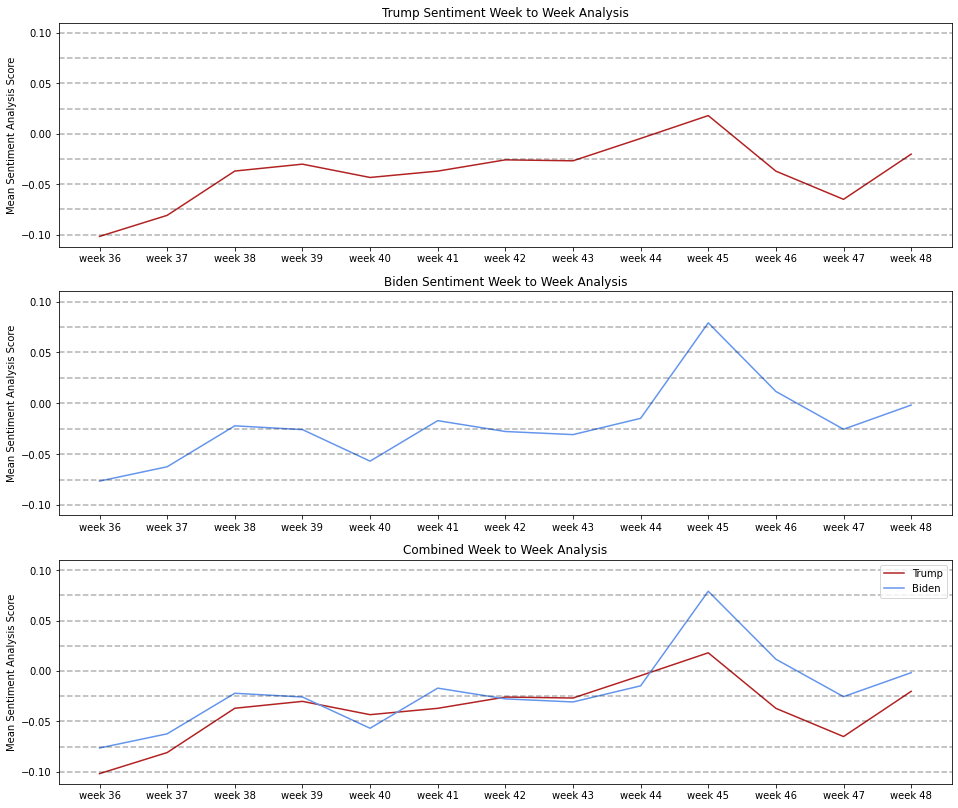

In [146]:
titles=['Trump Sentiment Week to Week Analysis','Biden Sentiment Week to Week Analysis','Combined Week to Week Analysis']
week_labels=list(range(36,49))
x_tick_labels=["week " + str(x) for x in list(range(36,49))]
                 
fig, ax=plt.subplots(3,1,figsize=(16,14))
                 
ax[0].plot(list(range(36,49)),mean_val_t2,color='firebrick')
ax[1].plot(list(range(36,49)),mean_val_b2,color='cornflowerblue')
                 
ax[2].plot(list(range(36,49)),mean_val_t2,color='firebrick',label='Trump')
ax[2].plot(list(range(36,49)),mean_val_b2,color='cornflowerblue',label='Biden')
ax[2].legend(loc='upper right')


for i in range(3):
    ax[i].set_title(titles[i])
    ax[i].set_ylabel('Mean Sentiment Analysis Score')
    
    ax[i].set_xticklabels(x_tick_labels)
    for j in np.linspace(-.1,.1,9):
        ax[i].axhline(j,linestyle='--',color='black',alpha=.3)
    ax[i].set_yticks(np.linspace(-.1,.1,5))
    ax[i].set_xticks(list(range(36,49)))
            
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\week_to_week_analysis_1.jpg',dpi=400,bbox_inches="tight")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\week_to_week_analysis_1.pdf',dpi=400,bbox_inches="tight")
               
plt.show()

C:\Users\capma\AppData\Local\Temp\ipykernel_26940\527832625.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x_tick_labels)


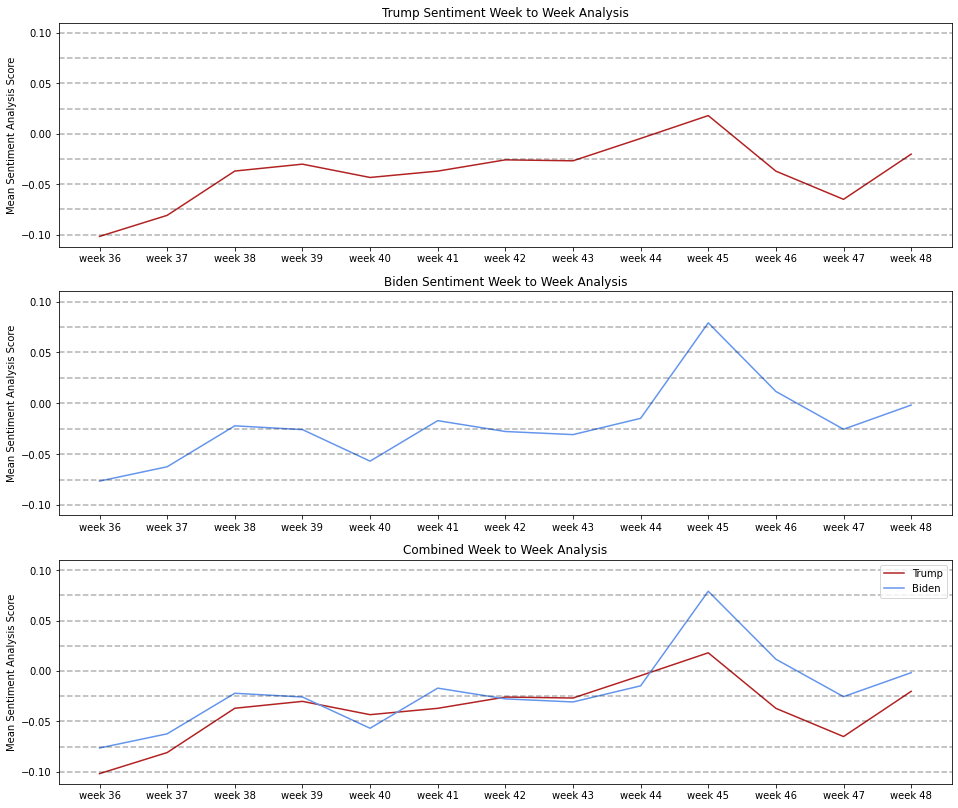

In [143]:
titles=['Trump Sentiment Week to Week Analysis','Biden Sentiment Week to Week Analysis','Combined Week to Week Analysis']
week_labels=list(range(36,49))
x_tick_labels=["week " + str(x) for x in list(range(36,49))]
                 
fig, ax=plt.subplots(3,1,figsize=(16,14))
                 
ax[0].plot(list(range(36,49)),mean_val_t2,color='firebrick')
ax[1].plot(list(range(36,49)),mean_val_b2,color='cornflowerblue')
                 
ax[2].plot(list(range(36,49)),mean_val_t2,color='firebrick',label='Trump')
ax[2].plot(list(range(36,49)),mean_val_b2,color='cornflowerblue',label='Biden')
ax[2].legend(loc='upper right')


for i in range(3):
    ax[i].set_title(titles[i])
    ax[i].set_ylabel('Mean Sentiment Analysis Score')
    
    ax[i].set_xticklabels(x_tick_labels)
    for j in np.linspace(-.1,.1,9):
        ax[i].axhline(j,linestyle='--',color='black',alpha=.3)
    ax[i].set_yticks(np.linspace(-.1,.1,5))
    ax[i].set_xticks(list(range(36,49)))
            
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\week_to_week_analysis_1.jpg',dpi=400,bbox_inches="tight")
plt.savefig(r'C:\Users\capma\Documents\GitHub\final-project-econ\graphs\week_to_week_analysis_1.pdf',dpi=400,bbox_inches="tight")
               
plt.show()

In [106]:
np.linspace(-.1,.1,9)

array([-0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.075,
        0.1  ])

In [ ]:
mean_val_b2

In [81]:
print(len(mean_val_b2),len(list(range(36,49))))

13 13
